In [ ]:
!pip3 install statsmodels
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install scikit-learn

import numpy as np
import pandas as pd

import datetime
import statsmodels as sm

import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [3]:
data = pd.read_csv('../datasets/sunspots.csv')
data.head(10)

,date,sunspots
0,1749.000000,58.0
1,1749.083333,62.6
2,1749.166667,70.0
3,1749.250000,55.7
4,1749.333333,85.0
5,1749.416667,83.5
6,1749.500000,94.8
7,1749.583333,66.3
8,1749.666667,75.9
9,1749.750000,75.5


In [4]:
data.dropna(inplace=True)

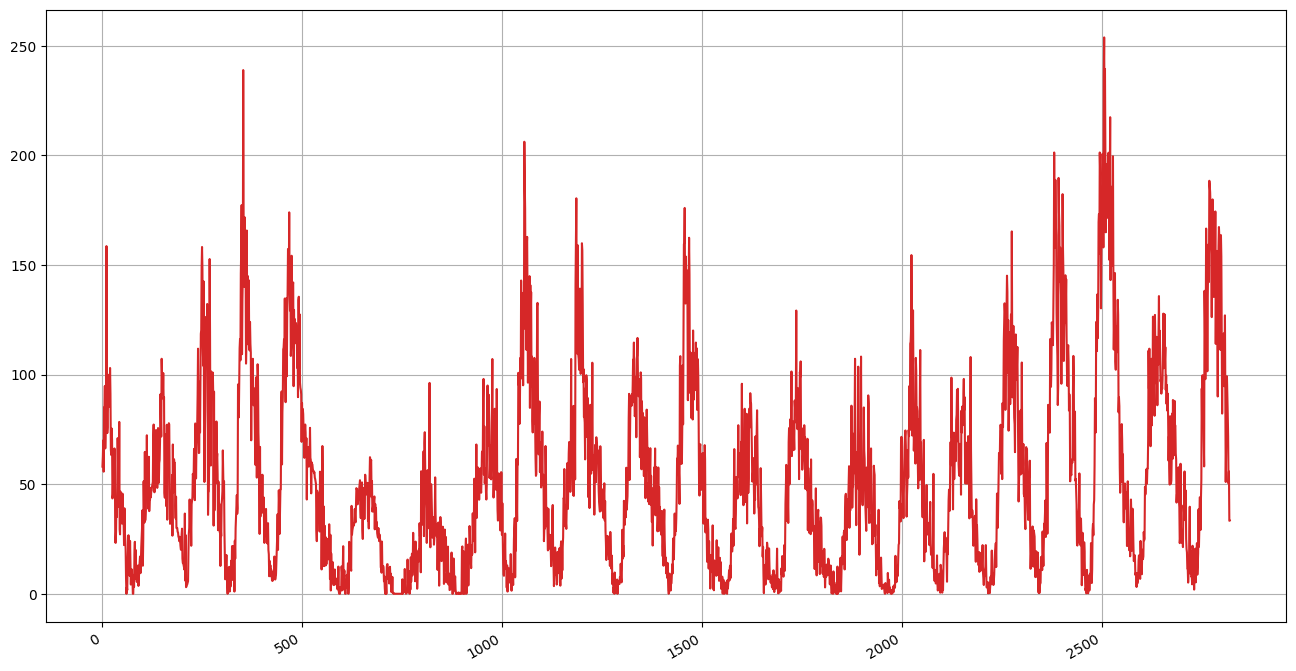

In [5]:
fig, ax = plt.subplots(figsize=(16, 9))
fig.autofmt_xdate()
ax.plot(data.sunspots, color='tab:red')
ax.grid()

In [6]:
data["sunspot_1"] = data["sunspots"].shift(1)
data["sunspot_2"] = data["sunspots"].shift(2)
print(data)

             date  sunspots  sunspot_1  sunspot_2
0     1749.000000      58.0        NaN        NaN
1     1749.083333      62.6       58.0        NaN
2     1749.166667      70.0       62.6       58.0
3     1749.250000      55.7       70.0       62.6
4     1749.333333      85.0       55.7       70.0
...           ...       ...        ...        ...
2815  1983.583333      71.8       82.2       91.1
2816  1983.666667      50.3       71.8       82.2
2817  1983.750000      55.8       50.3       71.8
2818  1983.833333      33.3       55.8       50.3
2819  1983.916667      33.4       33.3       55.8

[2820 rows x 4 columns]


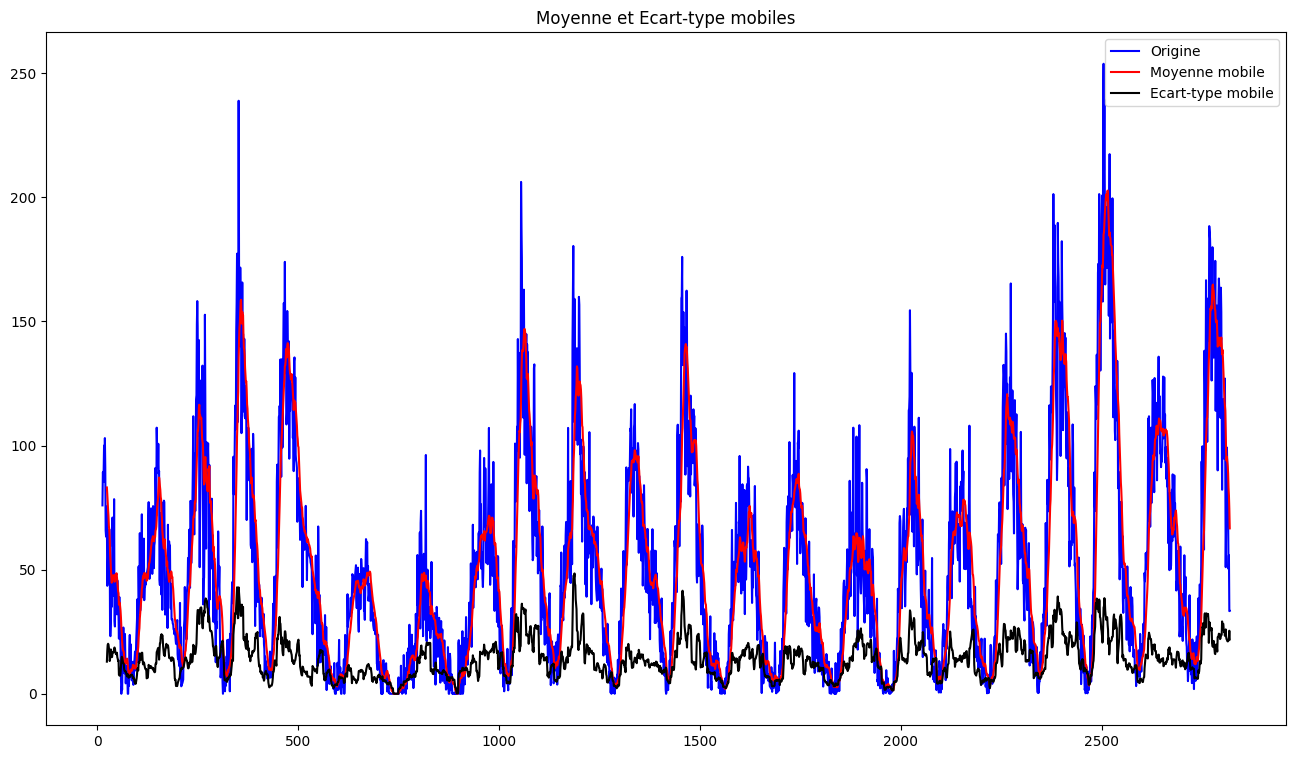

In [49]:
data["sunspots_m12"] = data["sunspots"].rolling(window = 12).mean()
data["sunspots_s12"] = data["sunspots"].rolling(window = 12).std()

fig, ax = plt.subplots(figsize=(16, 9))
plt.plot(data["sunspots"], color = 'blue', label = 'Origine')
plt.plot(data["sunspots_m12"], color = 'red', label = 'Moyenne mobile')
plt.plot(data["sunspots_s12"], color = 'black', label = 'Ecart-type mobile')
plt.legend(loc = 'best')
plt.title('Moyenne et Ecart-type mobiles')
plt.show()


In [46]:
data = data.dropna()
print(data)

             date  sunspots  sunspot_1  sunspot_2  sunspots_m12  sunspots_s12
13    1750.083333      75.9       73.3       85.2     83.308333     25.773293
14    1750.166667      89.2       75.9       73.3     84.908333     25.466144
15    1750.250000      88.3       89.2       75.9     87.625000     23.747885
16    1750.333333      90.0       88.3       89.2     88.041667     23.741504
17    1750.416667     100.0       90.0       88.3     89.416667     23.931601
...           ...       ...        ...        ...           ...           ...
2815  1983.583333      71.8       82.2       91.1     88.783333     21.188626
2816  1983.666667      50.3       71.8       82.2     83.075000     21.590155
2817  1983.750000      55.8       50.3       71.8     79.833333     22.583515
2818  1983.833333      33.3       55.8       50.3     74.433333     25.391349
2819  1983.916667      33.4       33.3       55.8     66.633333     21.913729

[2807 rows x 6 columns]


/Users/sylbarth/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/sylbarth/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/sylbarth/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


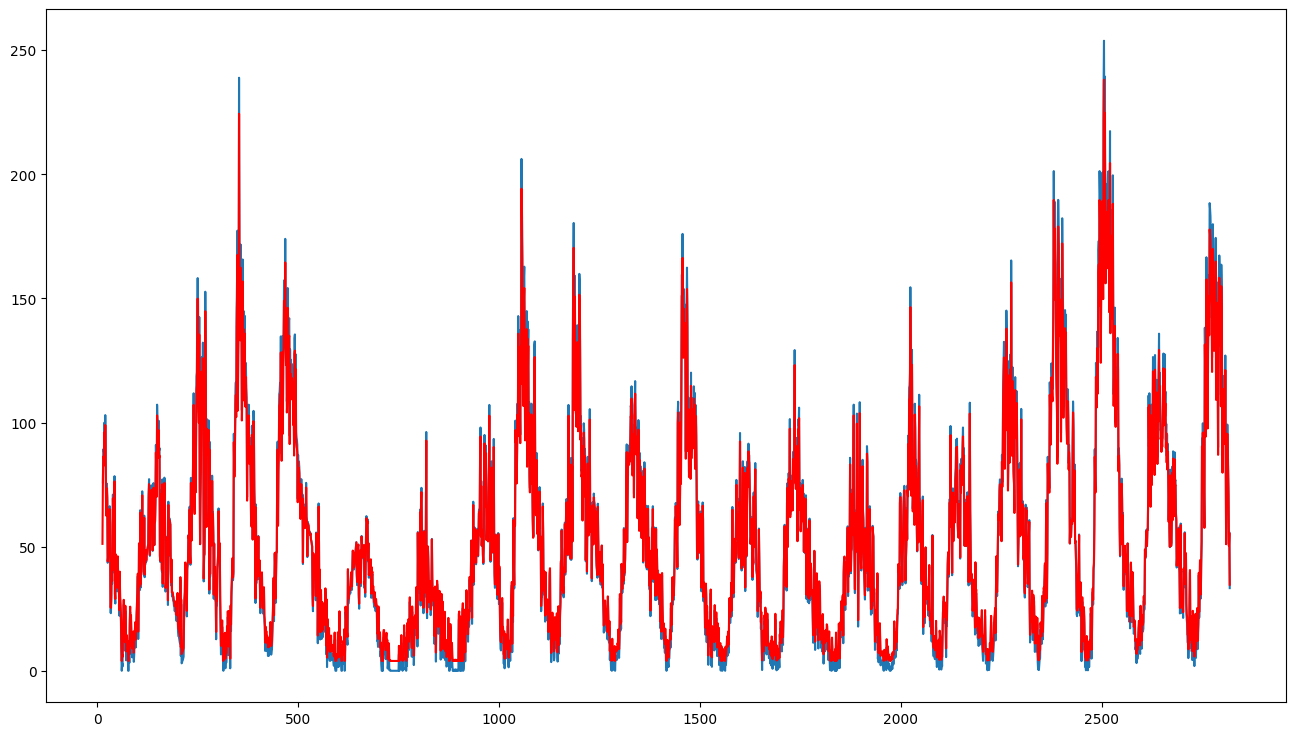

In [67]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data["sunspots"], order=(1, 0, 0))
results = model.fit()

fig, ax = plt.subplots(figsize=(16, 9))
plt.plot(data["sunspots"].shift(1))
plt.plot(results.fittedvalues, color='red')

In [ ]:
train = data.iloc[:1000]
test  = data.iloc[1000:]
print(train)
print(test)
print(train.columns)

             date  sunspots  sunspot_1  sunspot_2
2     1749.166667      70.0       62.6       58.0
3     1749.250000      55.7       70.0       62.6
4     1749.333333      85.0       55.7       70.0
5     1749.416667      83.5       85.0       55.7
6     1749.500000      94.8       83.5       85.0
...           ...       ...        ...        ...
997   1832.083333      55.5       30.9       28.9
998   1832.166667      55.1       55.5       30.9
999   1832.250000      26.9       55.1       55.5
1000  1832.333333      41.3       26.9       55.1
1001  1832.416667      26.7       41.3       26.9

[1000 rows x 4 columns]
             date  sunspots  sunspot_1  sunspot_2
1003  1832.583333       8.9       13.9       26.7
1004  1832.666667       8.2        8.9       13.9
1005  1832.750000      21.1        8.2        8.9
1006  1832.833333      14.3       21.1        8.2
1007  1832.916667      27.5       14.3       21.1
...           ...       ...        ...        ...
2815  1983.583333      71

In [9]:
x_train = train.loc[:,~train.columns.isin(["date","sunspots"])]
y_train = train["sunspots"]
print(x_train)
print(y_train)


      sunspot_1  sunspot_2
2          62.6       58.0
3          70.0       62.6
4          55.7       70.0
5          85.0       55.7
6          83.5       85.0
...         ...        ...
997        30.9       28.9
998        55.5       30.9
999        55.1       55.5
1000       26.9       55.1
1001       41.3       26.9

[1000 rows x 2 columns]
2       70.0
3       55.7
4       85.0
5       83.5
6       94.8
        ... 
997     55.5
998     55.1
999     26.9
1000    41.3
1001    26.7
Name: sunspots, Length: 1000, dtype: float64


In [39]:
from sklearn.tree import DecisionTreeRegressor

cart = DecisionTreeRegressor(random_state=0, min_samples_leaf=100)
fit = cart.fit(x_train, y_train)

[Text(0.6221858962992323, 0.9761904761904762, 'x[0] <= 56.85\nsquared_error = 1425.053\nsamples = 1000\nvalue = 43.939'),
 Text(0.3677414938668224, 0.9285714285714286, 'x[0] <= 26.15\nsquared_error = 402.628\nsamples = 710\nvalue = 25.917'),
 Text(0.49496369508302734, 0.9523809523809523, 'True  '),
 Text(0.24417217748664888, 0.8809523809523809, 'x[0] <= 14.05\nsquared_error = 120.173\nsamples = 381\nvalue = 12.069'),
 Text(0.1587830649198932, 0.8333333333333334, 'x[1] <= 26.85\nsquared_error = 69.576\nsamples = 261\nvalue = 8.209'),
 Text(0.09433515520694259, 0.7857142857142857, 'x[0] <= 3.1\nsquared_error = 53.986\nsamples = 252\nvalue = 7.515'),
 Text(0.03134178905206943, 0.7380952380952381, 'x[0] <= 0.85\nsquared_error = 31.232\nsamples = 98\nvalue = 3.491'),
 Text(0.017289719626168223, 0.6904761904761905, 'x[1] <= 8.9\nsquared_error = 21.035\nsamples = 65\nvalue = 2.148'),
 Text(0.011348464619492658, 0.6428571428571429, 'x[1] <= 1.2\nsquared_error = 16.088\nsamples = 61\nvalue = 1.

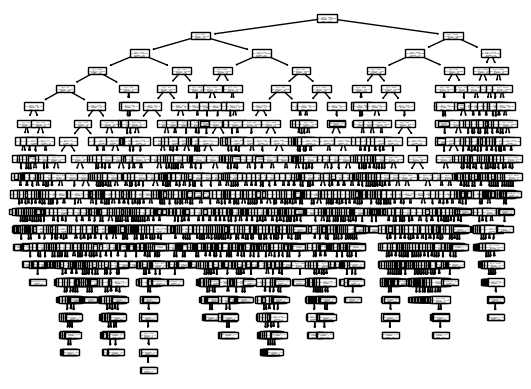

In [37]:
from sklearn.tree import plot_tree

plot_tree(fit)

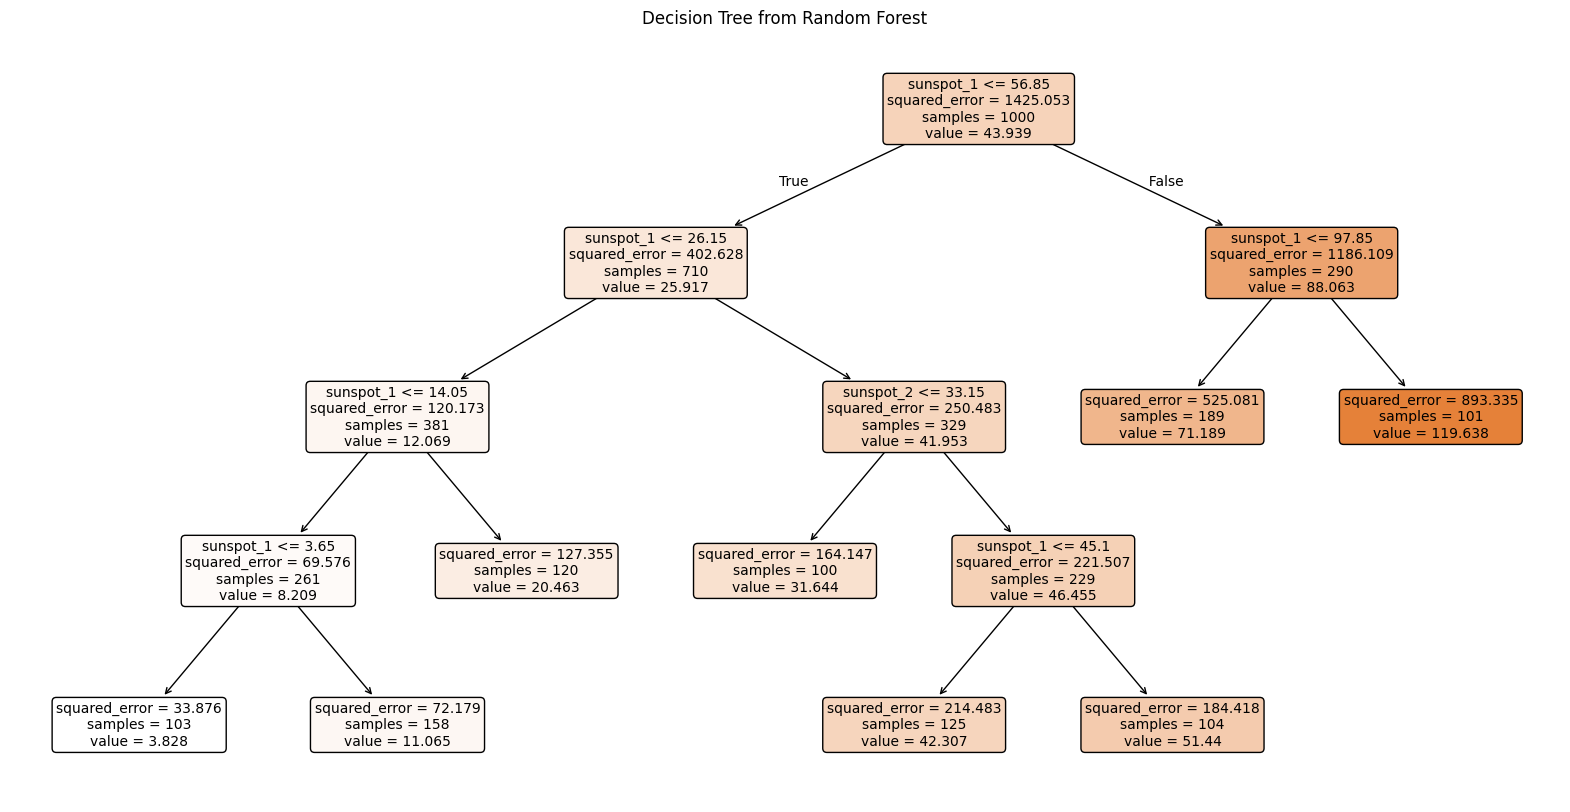

In [41]:
plt.figure(figsize=(20, 10))
plot_tree(fit, feature_names=x_train.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

In [42]:
from sklearn.metrics import mean_squared_error, r2_score

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

predictions = fit.predict(x_train)

# Evaluating the model
mse = mean_squared_error(y_train, predictions)
rmse = rmse(y_train, predictions)
print(f'Mean Squared Error: {mse}')
print(f'RMSE: {rmse}')

r2 = r2_score(y_train, predictions)
print(f'R-squared: {r2}')

Mean Squared Error: 282.0478817307822
RMSE: 16.7942812210223
R-squared: 0.8020789841875442


[11.06518987 11.06518987 11.06518987 ... 51.44038462 51.44038462
 42.3072    ]


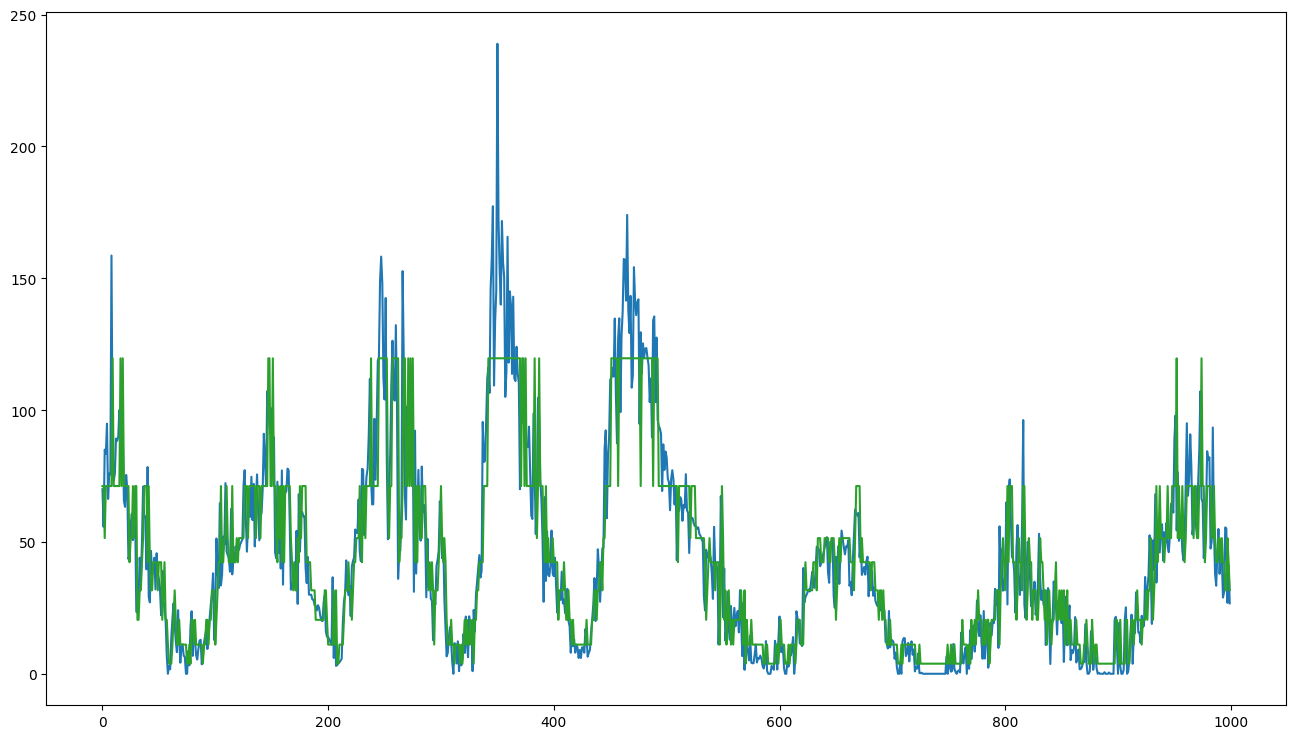

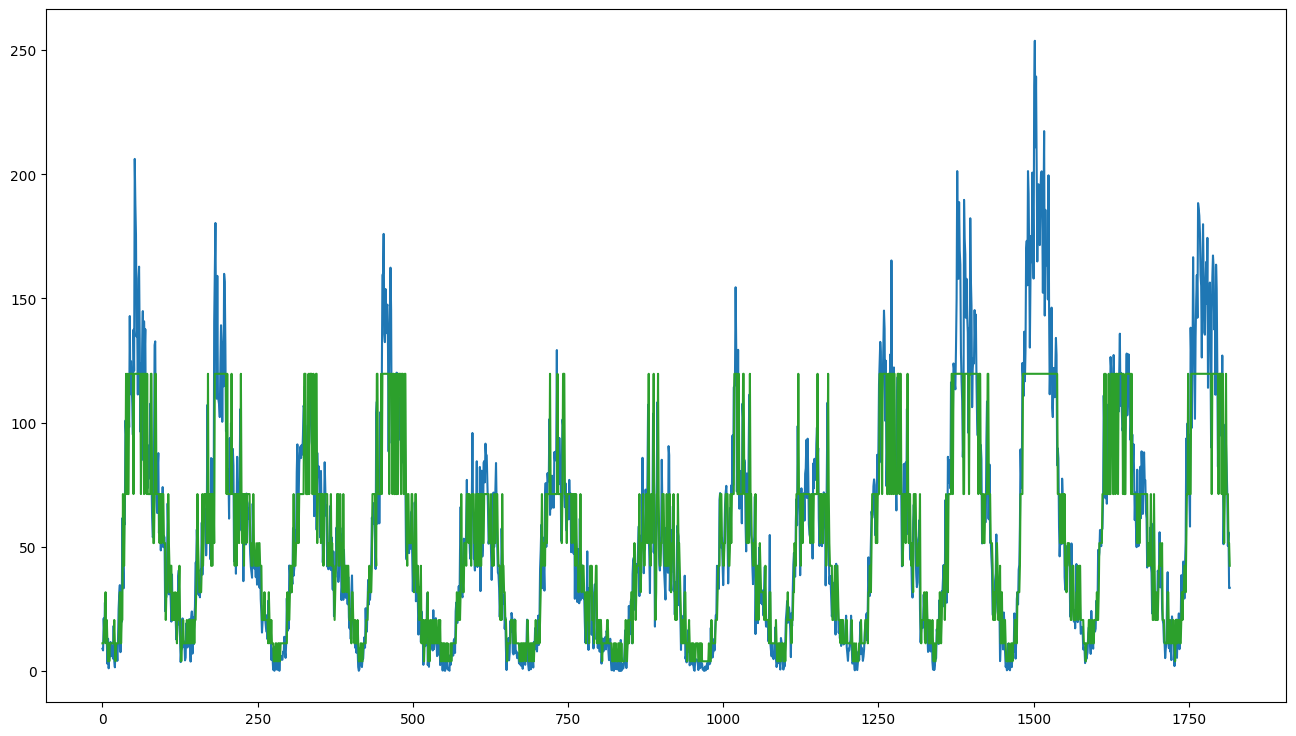

In [43]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(y_train.values, color='tab:blue')
ax.plot(predictions, color='tab:green')

# représenter les prévisions sur le test, identifier et comprendre le problème
x_test = test.loc[:,~test.columns.isin(["date","sunspots"])]
y_test = test["sunspots"]
y_test_predict = fit.predict(x_test)
print(y_test_predict)

fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(y_test.values, color='tab:blue')
ax.plot(y_test_predict, color='tab:green')


In [29]:
from sklearn.ensemble import RandomForestRegressor

rf  = RandomForestRegressor(random_state=1)
fit = rf.fit(x_train, y_train)

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

# Access the OOB Score
# oob_score = fit.oob_score_
# print(f'Out-of-Bag Score: {oob_score}')

# Making predictions on the same data or new data
predictions = fit.predict(x_train)

# Evaluating the model
mse = mean_squared_error(y_train, predictions)
rmse = rmse(y_train, predictions)
print(f'Mean Squared Error: {mse}')
print(f'RMSE: {rmse}')

r2 = r2_score(y_train, predictions)
print(f'R-squared: {r2}')

Mean Squared Error: 39.72490473027705
RMSE: 6.302769607900725
R-squared: 0.9721239051716254


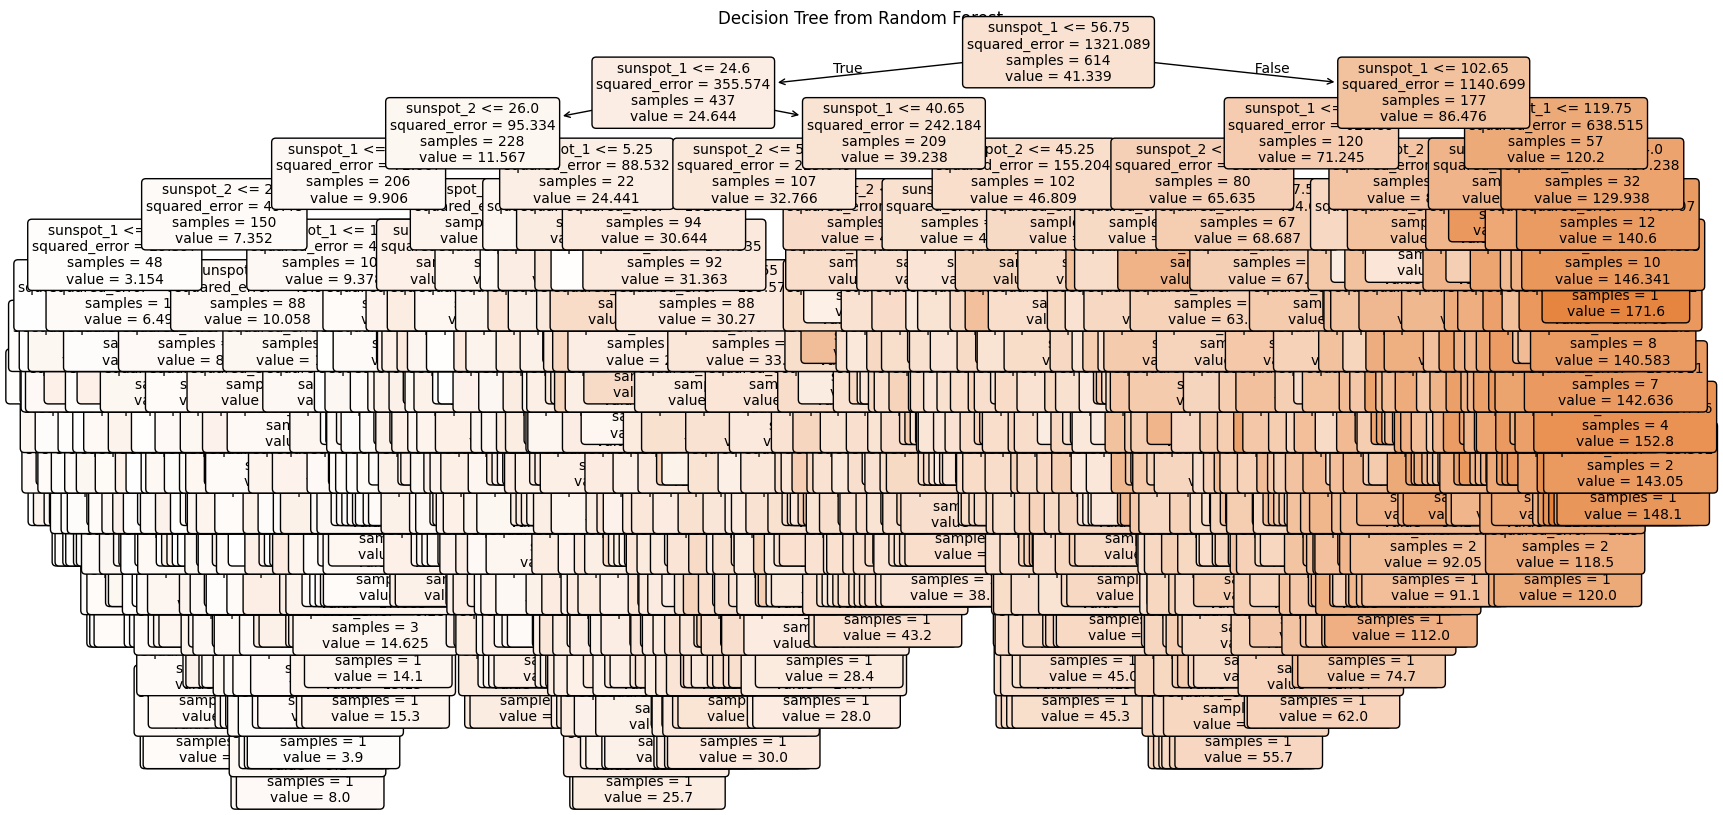

In [13]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming regressor is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = fit.estimators_[1]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=x_train.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

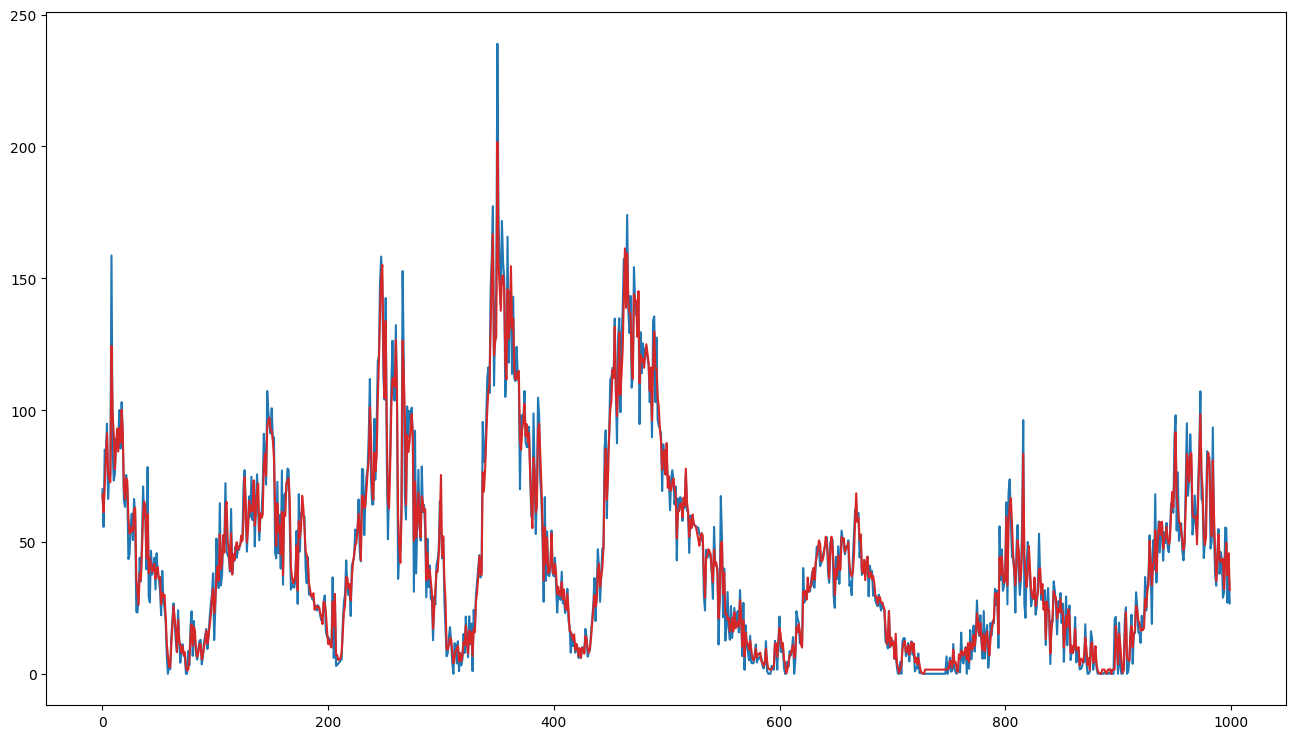

In [14]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(y_train.values, color='tab:blue')
ax.plot(predictions, color='tab:red')

[19.365 12.074 11.54  ... 60.612 51.83  40.045]


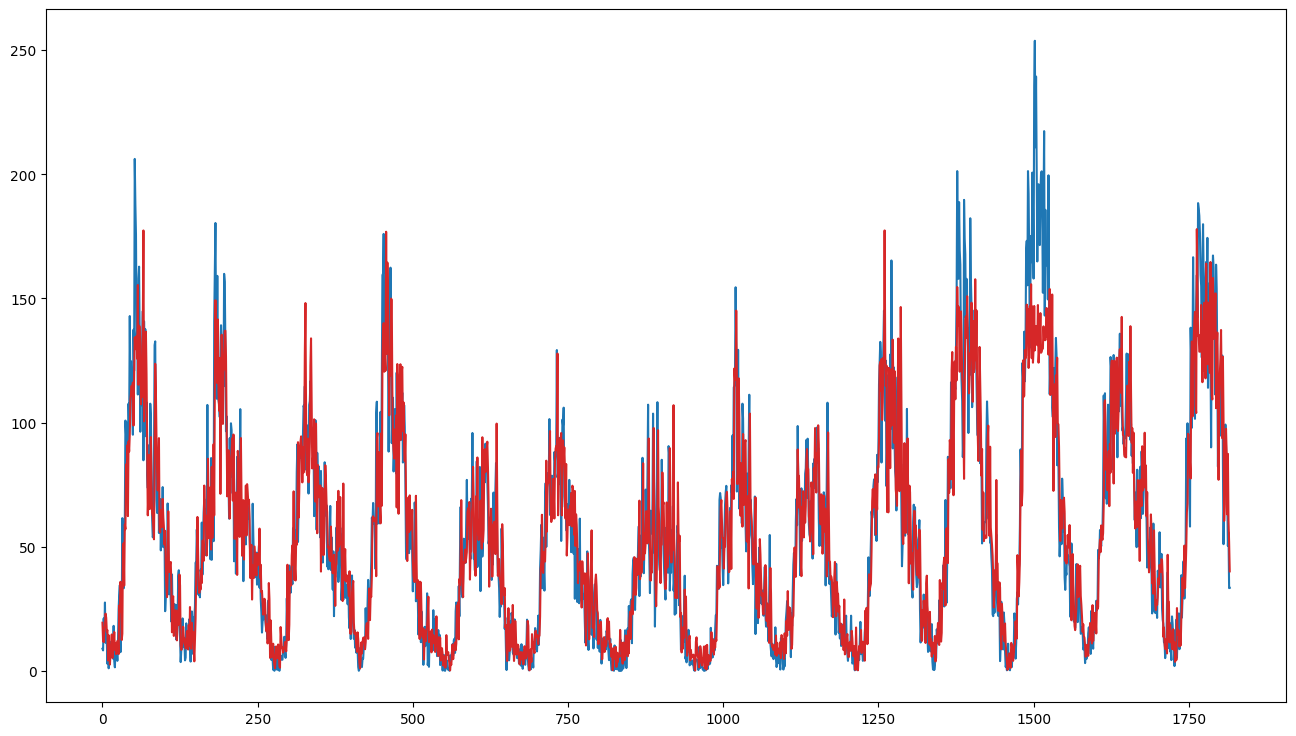

In [15]:
# représenter les prévisions sur le test, identifier et comprendre le problème
x_test = test.loc[:,~test.columns.isin(["date","sunspots"])]
y_test = test["sunspots"]
y_test_predict = fit.predict(x_test)
print(y_test_predict)

fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(y_test.values, color='tab:blue')
ax.plot(y_test_predict, color='tab:red')